# Google Data Analytics Capstone Project Case Study 1

# Introduction 
 You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
 company in Chicago. The director of marketing believes the company’s future success
 depends on maximizing the number of annual memberships. Therefore, your team wants to
 understand how casual riders and annual members use Cyclistic bikes di erently. From these
 insights, your team will design a new marketing strategy to convert casual riders into annual
 members. But first, Cyclistic executives must approve your recommendations, so they must be
 backed up with compeling data insights and professional data visualizations.

# ASK

Business Task:
Design marketing strategies aimed at converting casual riders into annual members.
Business Questions:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

I am assigned to answer the first question, and thus my analysis will be focused on comparing the annual members and casual riders.

Key Stakeholders:

1. Lily Moreno — Director of the marketing team and my manager.

2. Cyclistic executive team

# Prepare

To conduct a thorough analysis, we have to obtain the Cyclistic historical data trips from June 2024 to Dec 2024

Upon further examination, it is observed that all the files possess the same 13 columns or attributes, and the data types are appropriate and consistent throughout. These columns are as follows:

1. ride_id
2. rideable_type
3. started_at
4. ended_at
5. start_station_name
6. start_station_id
7. end_station_name
8. end_station_id
9. start_lat
10. start_lng
11. end_lat
12. end_lng
13. member_casual

## Process
To clean, analyze, and aggregate the large amount of monthly data stored in the folder, we will be using Jupyter — an integrated development environment designed for the programming language Python.

Next, we will be loading all the packages needed to perform the data manipulation.

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime 
import time

In [2]:
data_file_folder = r"E:\Courses\Google\8.Google Data Analytics Capstone Complete a Case Study\Module 2\Datasets\202401-202412-divvy-tripdata"

df = []
for file in os.listdir(data_file_folder):
    if file.endswith('.csv'):
        print('loading file {0}....'.format(file))
        df.append(pd.read_csv(os.path.join(data_file_folder,file)))

loading file 202401-divvy-tripdata.csv....
loading file 202402-divvy-tripdata.csv....
loading file 202403-divvy-tripdata.csv....
loading file 202404-divvy-tripdata.csv....
loading file 202405-divvy-tripdata.csv....
loading file 202406-divvy-tripdata.csv....
loading file 202407-divvy-tripdata.csv....
loading file 202408-divvy-tripdata.csv....
loading file 202409-divvy-tripdata.csv....
loading file 202410-divvy-tripdata.csv....
loading file 202411-divvy-tripdata.csv....
loading file 202412-divvy-tripdata.csv....


In [3]:
# concat the files
df_master = pd.concat(df)

In [4]:
# check the length of the dataset 
len(df_master)

5860568

In [5]:
df_master.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


In [6]:
df_master.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [7]:
df_master['started_at'] = pd.to_datetime(df_master['started_at'], errors='coerce')
df_master['ended_at'] = pd.to_datetime(df_master['ended_at'], errors='coerce')

Check the missing values

In [8]:
df_master.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

In [9]:
# check if the missing data are in same row
df_master[df_master['start_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
108385,E48D45D0BEA535AD,electric_bike,2024-01-26 14:50:26.000,2024-01-26 14:51:31.000,NaN,NaN,Broadway & Sheridan Rd,13323,41.95,-87.65,41.952833,-87.649993,member
108386,3F000D110338A447,electric_bike,2024-01-04 07:29:34.000,2024-01-04 07:53:22.000,NaN,NaN,Damen Ave & Division St,13136,41.97,-87.65,41.903266,-87.678435,member
108387,A28CE0443B032821,electric_bike,2024-01-13 20:27:12.000,2024-01-13 20:37:38.000,NaN,NaN,Pine Grove Ave & Waveland Ave,TA1307000150,41.95,-87.68,41.949202,-87.646353,member
108388,1D32548D0C9C502B,electric_bike,2024-01-22 17:07:32.000,2024-01-22 17:13:51.000,NaN,NaN,Drexel Ave & 60th St,22005,41.79,-87.59,41.785861,-87.604553,member
108389,39E6453D9DD466DE,electric_bike,2024-01-05 15:51:29.000,2024-01-05 15:56:08.000,NaN,NaN,Lincoln Ave & Diversey Pkwy,TA1307000064,41.93,-87.64,41.932225,-87.658617,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175773,1C9003B118722122,electric_bike,2024-12-19 22:05:02.708,2024-12-19 22:12:43.371,NaN,NaN,NaN,NaN,41.92,-87.70,41.920000,-87.710000,member
175774,DAFD865E633DCC3E,electric_bike,2024-12-27 13:52:35.255,2024-12-27 14:04:32.767,NaN,NaN,NaN,NaN,41.90,-87.68,41.890000,-87.630000,member
175775,71639EB9E374EFBF,electric_bike,2024-12-27 17:51:19.245,2024-12-27 17:58:08.002,NaN,NaN,NaN,NaN,41.80,-87.58,41.800000,-87.580000,member
175776,DE2D77DB6155D684,electric_bike,2024-12-26 19:42:04.430,2024-12-26 19:48:04.222,NaN,NaN,NaN,NaN,41.91,-87.67,41.910000,-87.670000,member


Remove the Missing Values

In [10]:
df_cleaned=df_master.dropna()

In [11]:
# Check the missing values again
df_cleaned.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
# check the unique ride_id count
df_cleaned['ride_id'].nunique()

4208188

In [13]:
# check the unque rideable_type values 
df_cleaned['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'electric_scooter'], dtype=object)

In [14]:
# check the unque member_casual values 
df_cleaned['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [15]:
# create a date, year, quarter and a month column
df_cleaned['date_of_the_ride'] = df_cleaned['started_at'].dt.date
df_cleaned['quarter'] = df_cleaned['started_at'].dt.quarter
df_cleaned['month'] = df_cleaned['started_at'].dt.month
df_cleaned['hour'] = df_cleaned['started_at'].dt.hour


# check the df again
df_cleaned.head()

C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\3992319746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_of_the_ride'] = df_cleaned['started_at'].dt.date
C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\3992319746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['quarter'] = df_cleaned['started_at'].dt.quarter
C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\3992319746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date_of_the_ride,quarter,month,hour
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,2024-01-12,1,1,15
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,2024-01-08,1,1,15
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,2024-01-27,1,1,12
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,2024-01-29,1,1,16
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,2024-01-31,1,1,5


In [16]:
# convert the month number into names
df_cleaned['month'] = pd.to_datetime(df_cleaned['month'], format='%m').dt.month_name()

C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\2601817751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = pd.to_datetime(df_cleaned['month'], format='%m').dt.month_name()


In [17]:
# convert the day number into names
df_cleaned['day_of_week'] = df_cleaned['started_at'].dt.day_name()

C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\1392008839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['day_of_week'] = df_cleaned['started_at'].dt.day_name()


In [18]:
#column for time the trip started
df_cleaned['time'] = df_cleaned['started_at'].dt.strftime('%H:%M')

C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\2632017483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time'] = df_cleaned['started_at'].dt.strftime('%H:%M')


In [19]:
#column for trip duration in min
df_cleaned['trip_duration_in_min'] = (df_cleaned['ended_at'] - df_cleaned['started_at']).dt.total_seconds().div(60).astype(float)

C:\Users\mhmds\AppData\Local\Temp\ipykernel_6512\4223440839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['trip_duration_in_min'] = (df_cleaned['ended_at'] - df_cleaned['started_at']).dt.total_seconds().div(60).astype(float)


In [20]:
df_cleaned.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date_of_the_ride,quarter,month,hour,day_of_week,time,trip_duration_in_min
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,2024-01-12,1,January,15,Friday,15:30,7.533333
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,2024-01-08,1,January,15,Monday,15:45,7.216667
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,2024-01-27,1,January,12,Saturday,12:27,8.000000
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,2024-01-29,1,January,16,Monday,16:26,29.816667
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,2024-01-31,1,January,5,Wednesday,05:43,26.200000


In [21]:
len(df_cleaned)

4208309

In [22]:
# Remove the rows with trip_duration that smaller than 0
df_cleaned = df_cleaned[df_cleaned['trip_duration_in_min'] >= 0]

In [23]:
len(df_cleaned)

4208269

In [24]:
df_cleaned.dtypes

ride_id                         object
rideable_type                   object
started_at              datetime64[ns]
ended_at                datetime64[ns]
start_station_name              object
start_station_id                object
end_station_name                object
end_station_id                  object
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
member_casual                   object
date_of_the_ride                object
quarter                          int64
month                           object
hour                             int64
day_of_week                     object
time                            object
trip_duration_in_min           float64
dtype: object

In [25]:
#dropping rows containing Tests in 'start_station_name' column

index_num = df_cleaned[df_cleaned['start_station_name'].str.contains("TEST" or "test" or "Test")==True].index
all_trips = df_cleaned.drop(index_num)

In [26]:
len(all_trips)

4208269

It is important to make sure that customer_type column has only two distinct values. Let's confirm the same.

In [27]:
pd.DataFrame(all_trips['member_casual'].value_counts()).rename(columns={'customer_type':'No. of Customers'})

,member_casual
member,2686670
casual,1521599


In [28]:
all_trips.drop(['start_station_id','end_station_id','ride_id'],axis=1,inplace=True)

In [29]:
all_trips.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date_of_the_ride,quarter,month,hour,day_of_week,time,trip_duration_in_min
0,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.903267,-87.634737,41.889177,-87.638506,member,2024-01-12,1,January,15,Friday,15:30,7.533333
1,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.902937,-87.634440,41.889177,-87.638506,member,2024-01-08,1,January,15,Monday,15:45,7.216667
2,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.902951,-87.634470,41.889177,-87.638506,member,2024-01-27,1,January,12,Saturday,12:27,8.000000
3,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.884295,-87.633963,41.921822,-87.644140,member,2024-01-29,1,January,16,Monday,16:26,29.816667
4,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.948797,-87.675278,41.889177,-87.638506,member,2024-01-31,1,January,5,Wednesday,05:43,26.200000


Rename some columns to be more readable

In [30]:
all_trips.rename(columns={'rideable_type':'bike_type','started_at':'start_time','ended_at':'end_time','member_casual':'membership'}, inplace=True)

In [32]:
all_trips.head()

,bike_type,start_time,end_time,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,membership,date_of_the_ride,quarter,month,hour,day_of_week,time,trip_duration_in_min
0,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.903267,-87.634737,41.889177,-87.638506,member,2024-01-12,1,January,15,Friday,15:30,7.533333
1,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.902937,-87.634440,41.889177,-87.638506,member,2024-01-08,1,January,15,Monday,15:45,7.216667
2,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.902951,-87.634470,41.889177,-87.638506,member,2024-01-27,1,January,12,Saturday,12:27,8.000000
3,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.884295,-87.633963,41.921822,-87.644140,member,2024-01-29,1,January,16,Monday,16:26,29.816667
4,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.948797,-87.675278,41.889177,-87.638506,member,2024-01-31,1,January,5,Wednesday,05:43,26.200000


Creating a csv file of the clean data for futher analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.

In [33]:
all_trips.to_csv('all_trips.csv',index=False,header=True)

## Analyze
The dataframe is now ready for descriptive analysis that will help us uncover some insights on how the casual riders and members use Cyclistic rideshare differently

In [34]:
all_trips= pd.read_csv('all_trips.csv')

In [35]:
#statistical summary of 'trip_duration_in_min' column

pd.DataFrame(all_trips['trip_duration_in_min'].describe().apply(lambda x: format(x, 'f')))

,trip_duration_in_min
count,4208269.000000
mean,16.658496
std,35.564439
min,0.000000
25%,5.833333
50%,10.135400
75%,18.216667
max,1509.366667


In [37]:
#statistical summary of 'trip_duration_in_min' of Members column

pd.DataFrame(all_trips.loc[all_trips['membership'] == 'member', 'trip_duration_in_min'].describe().apply(lambda x: format(x,'f'))).rename(columns={'trip_duration_in_min':'Members'})

,Members
count,2686670.000000
mean,12.471001
std,22.458047
min,0.000000
25%,5.216667
50%,8.816667
75%,15.016667
max,1497.650000


In [38]:
#statistical summary of 'trip_duration_in_min' of Casuals column

pd.DataFrame(all_trips.loc[all_trips['membership'] == 'casual', 'trip_duration_in_min'].describe().apply(lambda x: format(x,'f'))).rename(columns={'trip_duration_in_min':'Casuals'})

,Casuals
count,1521599.000000
mean,24.052308
std,50.218977
min,0.000000
25%,7.514067
50%,13.410667
75%,25.650000
max,1509.366667


The mean trip duration of member riders is lower than the mean trip duration of all trips.

Number of trips by casual customers and members

In [39]:
all_trips['membership'].value_counts()

member    2686670
casual    1521599
Name: membership, dtype: int64

There are Members rented more bikes than Casual in 2024

Top 5 station where riders started

In [41]:
#Top 5 stations by trip count
all_trips.groupby('start_station_name')['start_time'].nunique().nlargest(5)

start_station_name
Streeter Dr & Grand Ave               62124
DuSable Lake Shore Dr & Monroe St     41425
DuSable Lake Shore Dr & North Blvd    36611
Michigan Ave & Oak St                 36256
Kingsbury St & Kinzie St              35819
Name: start_time, dtype: int64

We can clearly see that Streeter Dr & Grand Ave has the greatest number of starts of 62124 in 2024.

Total Number of trips per quarter

In [42]:
# totlal trips per quarter

In [43]:
all_trips['quarter'].value_counts()

3    1619261
2    1234420
4     825771
1     528817
Name: quarter, dtype: int64

The third quarter has the most numbers of rides

## Share

Show numbers of trips per month

Text(0, 0.5, 'Number of Trips')

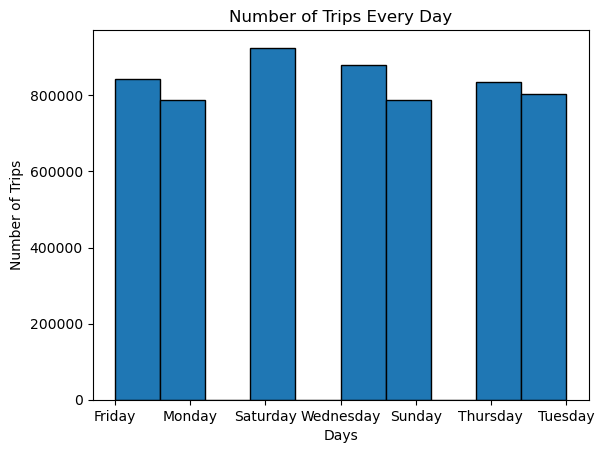

In [14]:
plt.hist(all_trips['day_of_week'],edgecolor='black')
plt.title('Number of Trips Every Day')
plt.xlabel('Days')
plt.ylabel('Number of Trips')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


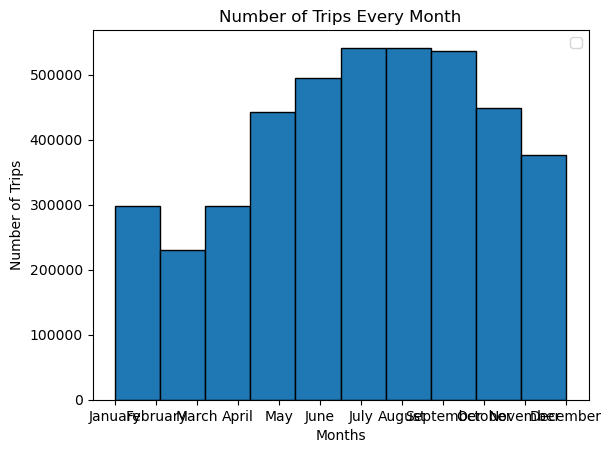

In [45]:
plt.hist(all_trips['month'],edgecolor='black')
plt.title('Number of Trips Every Month')
plt.xlabel('Months')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

July, Augst and september have the most tirps in 2024

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


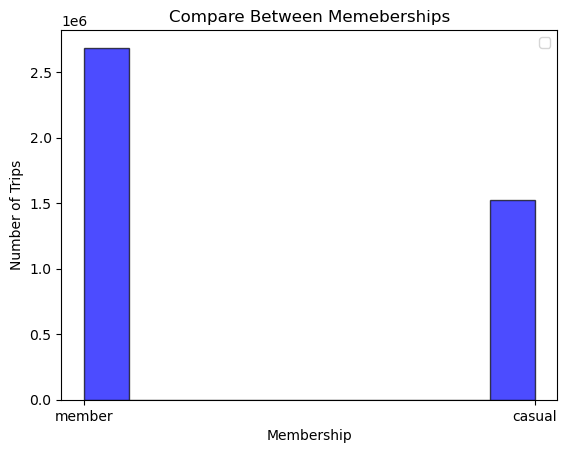

In [47]:
plt.hist(all_trips['membership'], edgecolor='black', alpha=0.7, color='blue')

# Add titles and labels
plt.title('Compare Between Memeberships')
plt.xlabel('Membership')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

member riders is the most number of riders in 2024

In [50]:
member_trips=all_trips[all_trips['membership']=='member']
casual_trips=all_trips[all_trips['membership']=='casual']


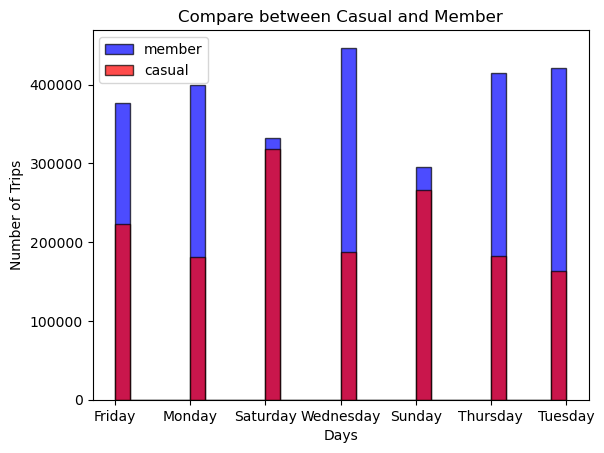

In [52]:
plt.hist(member_trips['day_of_week'], bins=30, edgecolor='black', alpha=0.7, color='blue', label='member')
plt.hist(casual_trips['day_of_week'], bins=30, edgecolor='black', alpha=0.7, color='red', label='casual')

# Add titles and labels
plt.title('Compare between Casual and Member')
plt.xlabel('Days')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

From this histogram we can see member riders are rides the bikes all days but the casual using bikes mostly in weekends

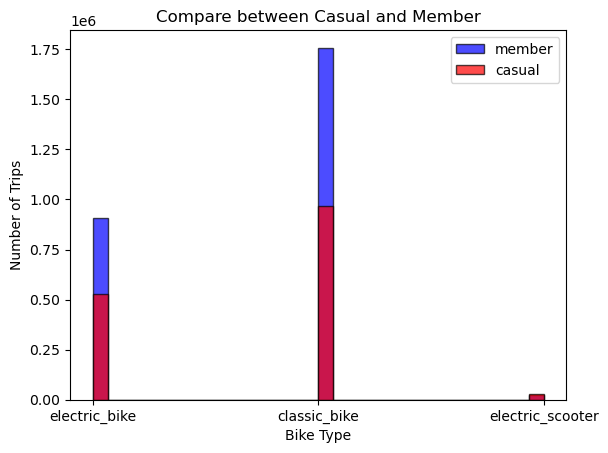

In [53]:
plt.hist(member_trips['bike_type'], bins=30, edgecolor='black', alpha=0.7, color='blue', label='member')
plt.hist(casual_trips['bike_type'], bins=30, edgecolor='black', alpha=0.7, color='red', label='casual')

# Add titles and labels
plt.title('Compare between Casual and Member')
plt.xlabel('Bike Type')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

Most annual members use the classic bike in their rides and they don't use the electric scooter